<!--
IRdisplay::display_html(file='code_hiding.html')
if the line above generates an error, it could be due to this:
https://github.com/IRkernel/IRdisplay/issues/41
In the meantime, the code below is enough; it works on nbviewer but not on the notebook directly
-->
<script>
  code_show=true;
  function code_toggle() {
    if (code_show){
      $('div.input').hide();
    } else {
      $('div.input').show();
    }
    code_show = !code_show
  } 
  $( document ).ready(code_toggle);
</script>
<font size=4>
<a href="javascript:code_toggle()">Toggle ON/OFF</a>
code cells.
</font>

# Joint entropy of the simplest Markov chain
First, let's compute the entropy of a sequence of observations $(x_1,\ldots,x_n)$ from a stationary Markov chain with two states and a symmetric transition rate $h$.

The entropy of the stationary distribution is $1$ bit.

What is the entropy of two observations?

Recall the equations:
$$H(X_1, X_2)=H(X_1)+H(X_2|X_1)$$
$$I(X_1;X_2)=H(X_2)-H(X_2|X_1)$$
In addition, with the simple statistics of our Markov chain, 
$$H(X_2|X_1)=-h\log_2 h - (1-h)\log_2 (1-h)$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython

In [3]:
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams.update({'font.size': 19})

In [4]:
def cond_ent(h):
    return -h*np.log2(h) - (1-h)*np.log2(1-h)

def bernoulli_entropy(p):
    return cond_ent(p)

[[<matplotlib.axis.YTick at 0x7f4209760dd8>,
 (0, 2.1),
 Text(0, 0.5, 'bits'),
 Text(0.5, 0, 'h'),
 Text(0.5, 1.0, 'joint entropy H(X1,X2)')]

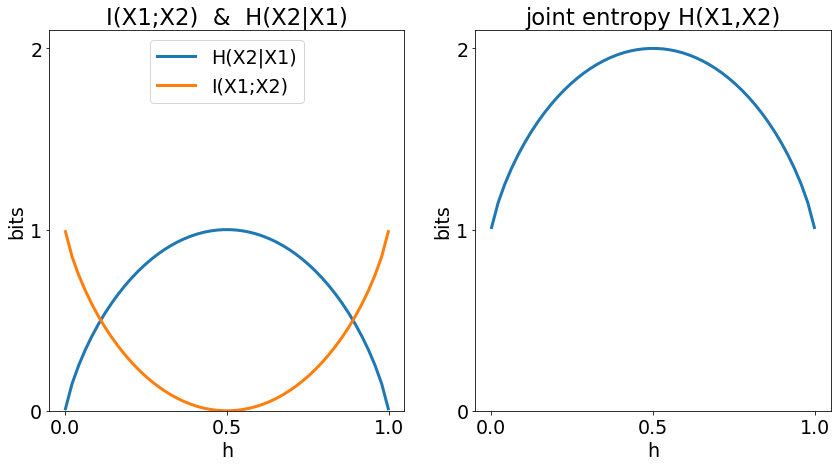

In [5]:
# %matplotlib inline
h = np.linspace(0.001, .999)
_, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(h, cond_ent(h), linewidth=3)
ax1.plot(h, 1-cond_ent(h), linewidth=3)
ax1.set(xlabel='h',
        ylabel='bits',
        title='I(X1;X2)  &  H(X2|X1)',
        ylim=[0,2+.1],
        yticks=[0,1,2],
        xticks=[0,0.5,1])
ax1.legend(['H(X2|X1)','I(X1;X2)'], loc='upper center')
# ax1.set_xlabel('h')
# ax1.set_title('conditional entropy H(X2|X1)')
# ax1.set_ylim(0,2)
# ax1.

joint_ent = 1 + cond_ent(h)
ax2.plot(h, joint_ent, linewidth=3)
ax2.set(xlabel='h',
        ylabel='bits',
        title='joint entropy H(X1,X2)',
        ylim=[0,2+.1],
        yticks=[0,1,2],
        xticks=[0,0.5,1])
# ax2.legend(['H(X2|X1)','I(X1;X2)'], loc='upper center')

As $h$ gets closer to 0.5, $X_2$ and $X_1$ become more and more independent. Their mutual information decreases while their joint entropy increases.

The same plots with $|h-0.5|$ in the x axis become:

[[<matplotlib.axis.YTick at 0x7f41ed5464e0>,
 (0, 2.1),
 Text(0, 0.5, 'bits'),
 Text(0.5, 0, '|h-0.5|'),
 Text(0.5, 1.0, 'joint entropy H(X1,X2)')]

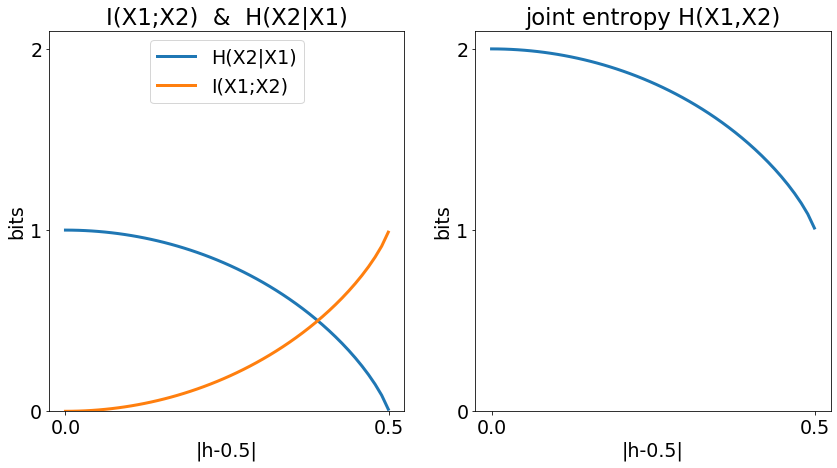

In [6]:
h_dist = 0.5 - np.linspace(0.001, .5)
h_reparam = -h_dist + 0.5
conditional_entropy = cond_ent(h_reparam)

_, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(h_dist, conditional_entropy, linewidth=3)
ax1.plot(h_dist, 1-conditional_entropy, linewidth=3)
ax1.set(xlabel='|h-0.5|',
        ylabel='bits',
        title='I(X1;X2)  &  H(X2|X1)',
        ylim=[0,2+.1],
        yticks=[0,1,2],
        xticks=[0,0.5])
ax1.legend(['H(X2|X1)','I(X1;X2)'], loc='upper center')
# ax1.set_xlabel('h')
# ax1.set_title('conditional entropy H(X2|X1)')
# ax1.set_ylim(0,2)
# ax1.

ax2.plot(h_dist, 1 + conditional_entropy, linewidth=3)
ax2.set(xlabel='|h-0.5|',
        ylabel='bits',
        title='joint entropy H(X1,X2)',
        ylim=[0,2+.1],
        yticks=[0,1,2],
        xticks=[0,0.5])
# ax2.legend(['H(X2|X1)','I(X1;X2)'], loc='upper center')

What about $N$ observations? The equation simply becomes,
$$H(X_1,\ldots,X_n)=-(n-1)I(X_1;X_2)+\sum_{i=1}^nH(X_i)=1+(n-1)H(X_2|X_1),$$

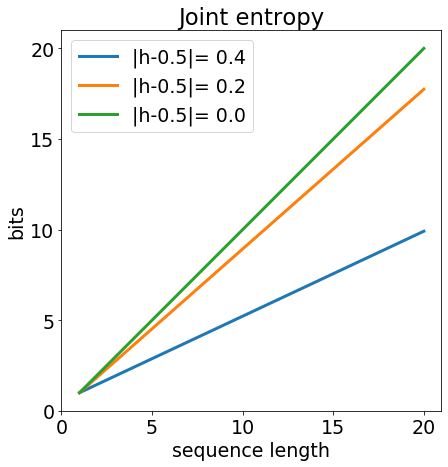

In [7]:
discrete_h = np.array([.1,.3,.5])
N=20
num_obs = np.arange(1,N+1)
_, ax = plt.subplots()
for h_val in discrete_h:
    ax.plot(num_obs, 1+cond_ent(h_val)*(num_obs-1), linewidth=3)
ax.set(xlabel='sequence length',
       ylabel='bits',
       title='Joint entropy',
       ylim=[0,N+1], 
       xticks=np.arange(0,N+1,5),
       yticks=np.arange(0,N+1,5))
ax.legend([f"|h-0.5|= {abs(x-0.5)}" for x in discrete_h])
ax.set_aspect('equal')

In other words, the joint entropy of a finite sequence of realizations from our Markov chain is linear in the number of observations, and the rate of growth is parameterized by $|h-0.5|$.

## Rate of convergence of empirical estimation of entropy

### Estimation of simple Bernoulli r.v.

To start simple, let $X\sim Ber(p)$. In theory, $H(X)=-p\log_2 p - (1-p)\log_2 (1-p)$. The question is, for various values of $p\in[0,0.5]$, how _quickly_ does the estimate $\hat{H}_n$ converge to $H(X)$? By $n$ we mean that $n$ i.i.d samples from $X$ are observed. The MLE would be, with $\bar{x}=(\sum_i x_i )/n$:
$$
\hat{H}:=-\bar{x}\log_2 \bar{x} - (1-\bar{x})\log_2 (1-\bar{x})
$$

In [8]:
pvals=[.1,.2,.3,.5, .9]
num_sims = 1000
sample_sizes = [10, 50, 100, 150, 200, 250, 300]
# print(sample_sizes

In [9]:
def generate_samples(num_samples, p):
    return np.random.binomial(1, p, size=num_samples)

In [10]:
def estimate_entropy(sample):
    return bernoulli_entropy(np.mean(sample))

In [11]:
p = []         # parameter of Bernoulli
size = []      # sample size
sim = []       # simulation number
estimate = []  # estimate of entropy for specific sample

for samplesize in sample_sizes:
    for pval in pvals:
        for si in range(num_sims):
            s = generate_samples(samplesize, pval)
            ent = estimate_entropy(s)
            
            p.append(pval)
            size.append(samplesize)
            sim.append(si + 1)
            estimate.append(ent)
sims = pd.DataFrame(np.array([p, size, sim, estimate]).transpose(), columns=["p", "size", "sim", "estimate"])
sims.head()

/home/adrian/anaconda3/envs/r-environment/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/home/adrian/anaconda3/envs/r-environment/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


,p,size,sim,estimate
0,0.1,10.0,1.0,NaN
1,0.1,10.0,2.0,0.881291
2,0.1,10.0,3.0,0.468996
3,0.1,10.0,4.0,0.721928
4,0.1,10.0,5.0,NaN


In [12]:
print(len(sims), 4 * 4*100)

35000 1600


In [13]:
ents = []
for p in pvals:
    ents.append({'p': p, 'ent': bernoulli_entropy(p)})
df_p = pd.DataFrame(ents)
print(df_p)

     p       ent
0  0.1  0.468996
1  0.2  0.721928
2  0.3  0.881291
3  0.5  1.000000
4  0.9  0.468996


In [14]:
%%R
library(data.table)
library(ggplot2)

/home/adrian/anaconda3/envs/r-environment/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: data.table 1.11.8  Latest news: r-datatable.com

  warnings.warn(x, RRuntimeWarning)


/home/adrian/anaconda3/envs/r-environment/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


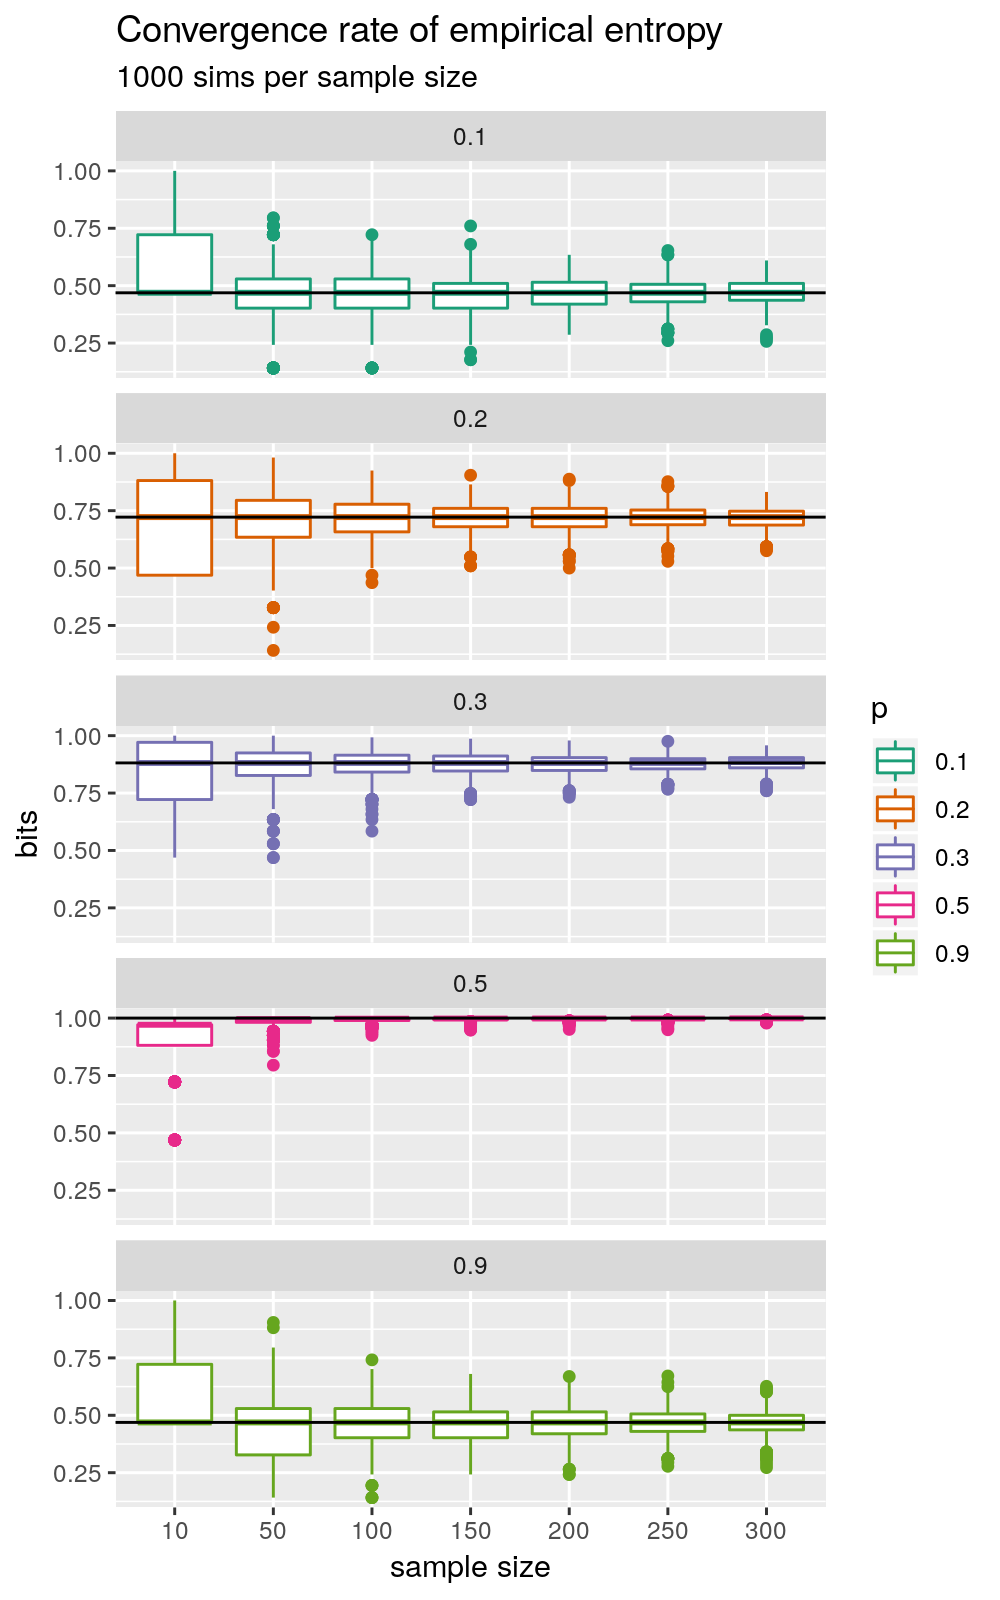

In [15]:
%%R -i sims -i df_p -i num_sims -w 5 -h 8 --units in -r 200

sims <- as.data.table(sims)
sims[,p:=factor(p, ordered=T)]
sims[,size:=factor(size, ordered=T)]

ggplot(sims, aes(x=size, y=estimate, group=size)) + geom_boxplot(aes(col=p)) + 
  facet_wrap(~p, ncol=1) + 
  geom_hline(aes(yintercept=ent), data=df_p) + ylab("bits") + xlab("sample size") +
  ggtitle("Convergence rate of empirical entropy")+
  labs(subtitle=paste(num_sims, "sims per sample size")) +
  scale_color_brewer(palette="Dark2")

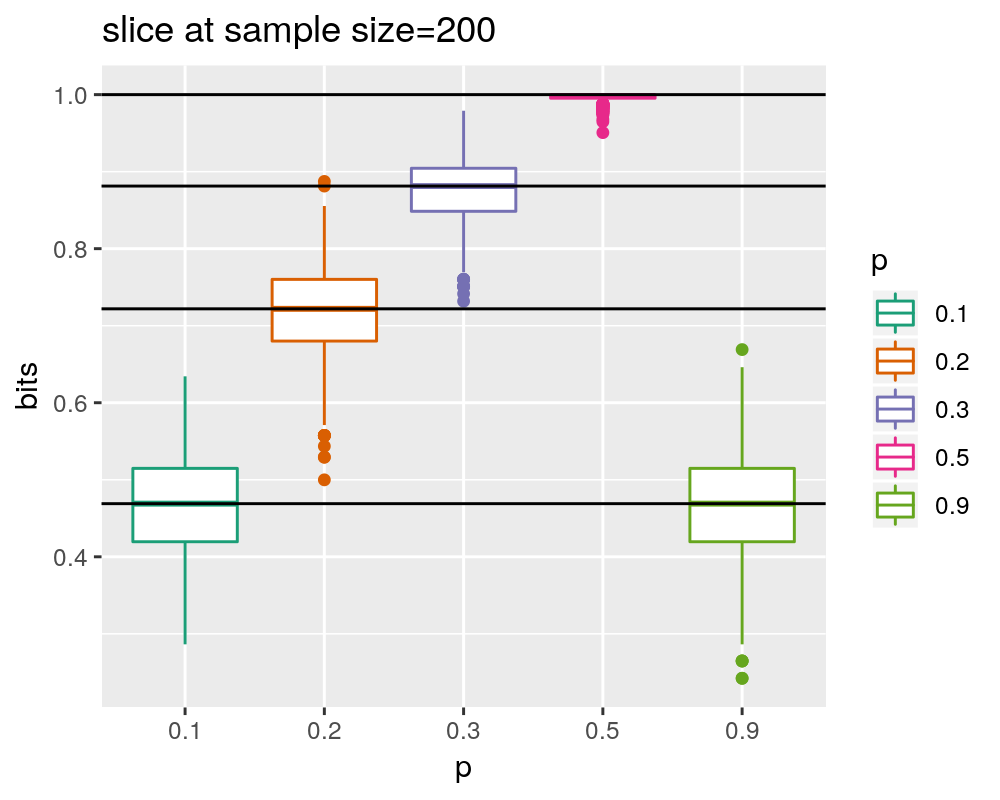

In [16]:
%%R  -w 5 -h 4 --units in -r 200
ggplot(sims[size==200], aes(x=p, y=estimate)) + geom_boxplot(aes(col=p)) + 
  geom_hline(yintercept=c(0.468996,0.721928,0.881291,1.000000)) +
  ggtitle("slice at sample size=200") +
  ylab("bits") +
  scale_color_brewer(palette="Dark2")

We observe that the convergence rate improves as $p$ gets closer to $0.5$ or, equivalently, as the entropy of the Bernoulli variable rises.

### Estimation of MI between 2 Bernoulli r.v.

Call $X, Y$ two Bernoulli random variables with respective parameters $p_X, p_Y$. If the two r.v. are independent, then $I(X;Y)=0$. However, because of finite sample effects, some non-zero MI could be erroneously estimated between the two. 

Let's first have a look at the convergence rate for MI estimation. In a sample of size $2n$, we set $Y_i=X_i$ if $i$ is even, and draw $Y_i$ independently from $X$ if $i$ is odd. When $p_X=p_Y$, this should lead to $I(X;Y)=p_X/2$.

# Link to our auditory change-point task
The Markov chain $X_n$ described above has the same statistics as our source variable $S_n$, _if the hazard rate $h$ is kept constant_.